<a href="https://www.kaggle.com/code/parisrohan/rp-pima-diabetes-1-eda-feature-transf-model?scriptVersionId=91979204" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


### Load required libraries and data

In [2]:
#Load required libraries
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab 
plt.style.use("seaborn-whitegrid")
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Laod the dataset
df_data=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Feature Description:
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

## EDA

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_data.shape

(768, 9)

### Distribution of data

Text(0.5, 0, 'Outcome')

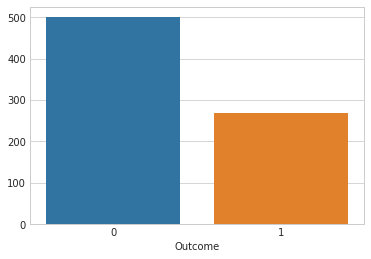

In [6]:
#distribution of values in target feature
sns.barplot(x=df_data['Outcome'].value_counts().index, y=df_data['Outcome'].value_counts().values, data=df_data)
plt.xlabel('Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

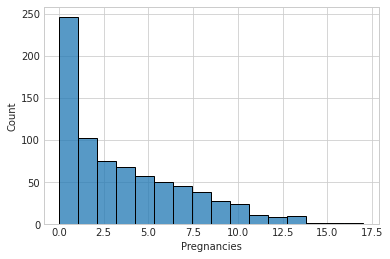

In [7]:
sns.histplot(data=df_data, x='Pregnancies')

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

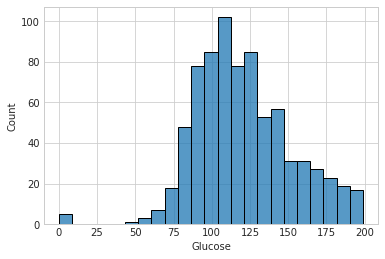

In [8]:
sns.histplot(data=df_data, x='Glucose')

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

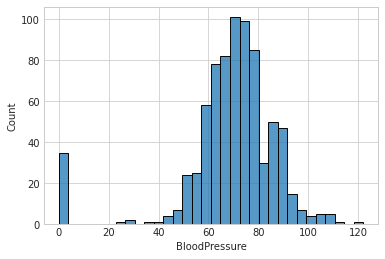

In [9]:
sns.histplot(data=df_data, x='BloodPressure')

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

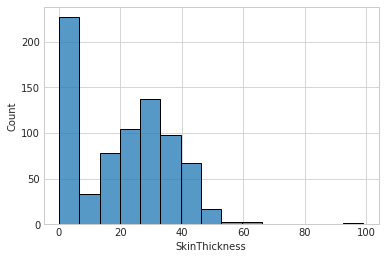

In [10]:
sns.histplot(data=df_data, x='SkinThickness')

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

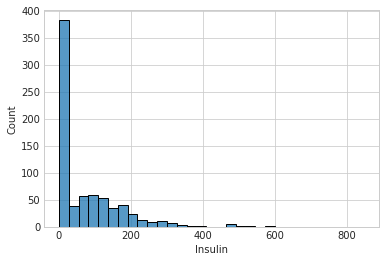

In [11]:
sns.histplot(data=df_data, x='Insulin')

<AxesSubplot:xlabel='BMI', ylabel='Count'>

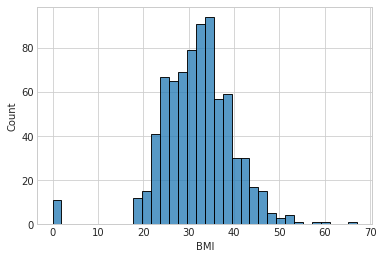

In [12]:
sns.histplot(data=df_data, x='BMI')

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

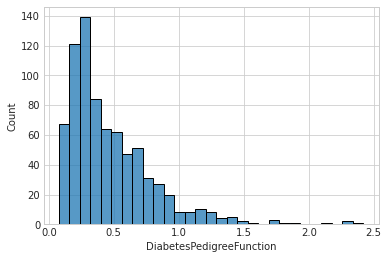

In [13]:
sns.histplot(data=df_data, x='DiabetesPedigreeFunction')

<AxesSubplot:xlabel='Age', ylabel='Count'>

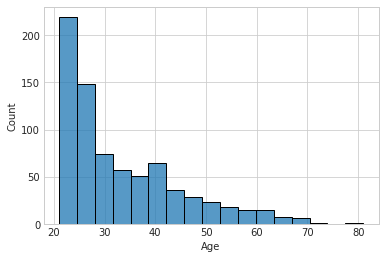

In [14]:
sns.histplot(data=df_data, x='Age')

Observation:
* There are no categorical features
* Features like Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction and Age are right-skewed
* There are few outliers

### Check for missing data

In [15]:
#Functon to get count of missing values in each column
def get_cols_with_missing_values(DataFrame):
    missing_na_columns=(DataFrame.isnull().sum())
    return missing_na_columns[missing_na_columns > 0]

In [16]:
print(get_cols_with_missing_values(df_data))

Series([], dtype: int64)


Observation: The given dataset has **no missing values**

### Unexpected Outliers

In [17]:
df_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Observation:
* Features like Glucose, BloodPressure, SkinThickness, Insulin, BMI have 0 as a value
* This must be an invalid reading as a living human being cannot have such a low value for these features

In [18]:
print("Total 0 value outliers in Glucose: ", df_data[df_data.Glucose == 0].shape[0])

Total 0 value outliers in Glucose:  5


In [19]:
print("Total 0 value outliers in BloodPressure: ", df_data[df_data.BloodPressure == 0].shape[0])

Total 0 value outliers in BloodPressure:  35


In [20]:
print("Total 0 value outliers in Insulin: ", df_data[df_data.Insulin == 0].shape[0])

Total 0 value outliers in Insulin:  374


In [21]:
print("Total 0 value outliers in SkinThickness: ", df_data[df_data.SkinThickness == 0].shape[0])

Total 0 value outliers in SkinThickness:  227


In [22]:
print("Total 0 value outliers in BMI: ", df_data[df_data.BMI == 0].shape[0])

Total 0 value outliers in BMI:  11


In [23]:
df_data2= df_data[(df_data.BloodPressure!=0)&(df_data.Glucose!=0)&(df_data.BMI!=0)]
df_data2.drop(['SkinThickness'],axis=1,inplace=True)
df_data2.shape

(724, 8)

## Feature Transformation

In [24]:
numerical_cols = [cname for cname in df_data2.columns if cname!='Outcome']
skew_df = pd.DataFrame(numerical_cols, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df_data2[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Pregnancies,0.903173,0.903173,True
1,Glucose,0.526024,0.526024,True
2,BloodPressure,0.137344,0.137344,False
3,Insulin,2.196314,2.196314,True
4,BMI,0.596946,0.596946,True
5,DiabetesPedigreeFunction,1.917550,1.917550,True
6,Age,1.086270,1.086270,True


In [25]:
df_data2.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
#Apply log1p transformation because Pregnancies and Insulin feature as have a 0 value. 
'''for column in skew_df.query("Skewed == True")['Feature'].values:
    df_data2[column] = np.log1p(df_data2[column])'''

'for column in skew_df.query("Skewed == True")[\'Feature\'].values:\n    df_data2[column] = np.log1p(df_data2[column])'

In [27]:
#df_data2.hist(figsize=(9, 9))

In [28]:
#QQ plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

### 1. Log transformation

In [29]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    df_data2[column+'_log'] = np.log1p(df_data2[column])

array([[<AxesSubplot:title={'center':'Pregnancies_log'}>,
        <AxesSubplot:title={'center':'Glucose_log'}>],
       [<AxesSubplot:title={'center':'Insulin_log'}>,
        <AxesSubplot:title={'center':'BMI_log'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction_log'}>,
        <AxesSubplot:title={'center':'Age_log'}>]], dtype=object)

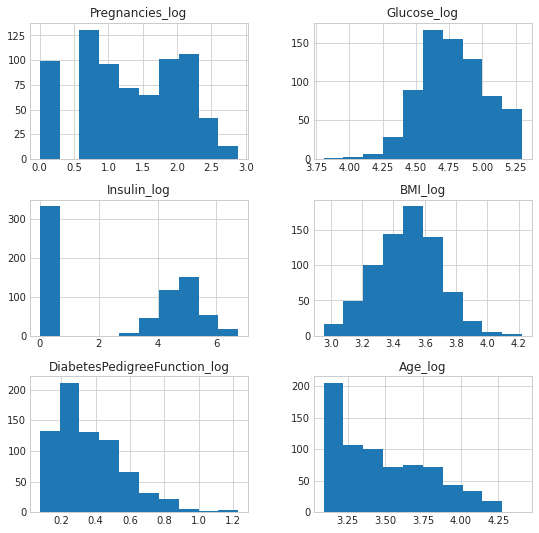

In [30]:
df_data_log=df_data2[['Pregnancies_log', 'Glucose_log', 'Insulin_log', 'BMI_log', 'DiabetesPedigreeFunction_log', 'Age_log']]
df_data_log.hist(figsize=(9, 9))

### 2. Reciprocal transformation 

In [31]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    df_data2[column+'_rec']=1/(df_data2[column]+1)

array([[<AxesSubplot:title={'center':'Pregnancies_rec'}>,
        <AxesSubplot:title={'center':'Glucose_rec'}>],
       [<AxesSubplot:title={'center':'Insulin_rec'}>,
        <AxesSubplot:title={'center':'BMI_rec'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction_rec'}>,
        <AxesSubplot:title={'center':'Age_rec'}>]], dtype=object)

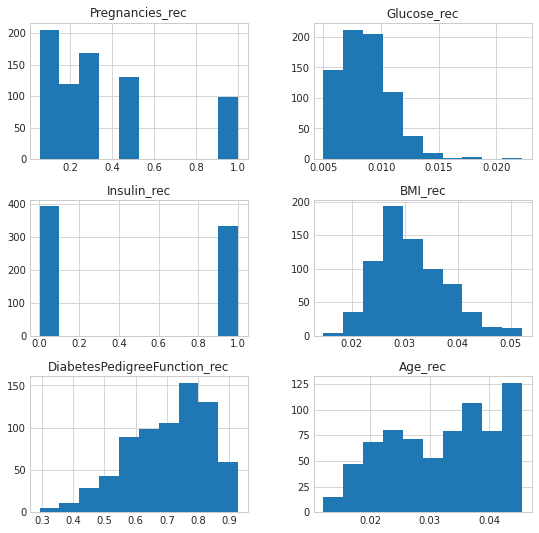

In [32]:
df_data_rec=df_data2[['Pregnancies_rec', 'Glucose_rec', 'Insulin_rec', 'BMI_rec', 'DiabetesPedigreeFunction_rec', 'Age_rec']]
df_data_rec.hist(figsize=(9, 9))

### 3. Square root transformation

In [33]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    df_data2[column+'_square']=df_data2[column]**(1/2)

array([[<AxesSubplot:title={'center':'Pregnancies_square'}>,
        <AxesSubplot:title={'center':'Glucose_square'}>],
       [<AxesSubplot:title={'center':'Insulin_square'}>,
        <AxesSubplot:title={'center':'BMI_square'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction_square'}>,
        <AxesSubplot:title={'center':'Age_square'}>]], dtype=object)

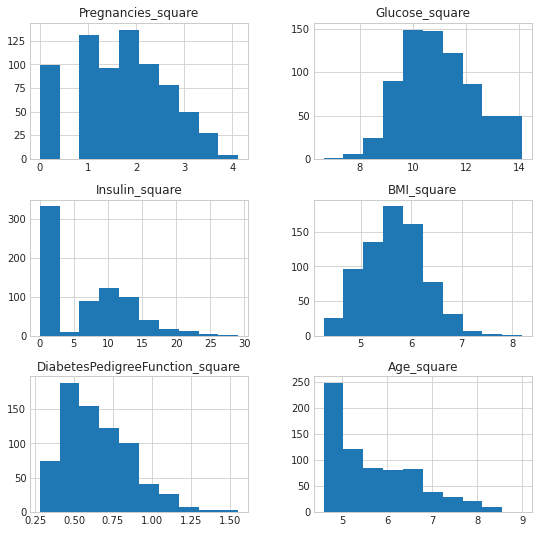

In [34]:
df_data_square=df_data2[['Pregnancies_square', 'Glucose_square', 'Insulin_square', 'BMI_square', 'DiabetesPedigreeFunction_square', 'Age_square']]
df_data_square.hist(figsize=(9, 9))

### 4. Exponential transformation

In [35]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    df_data2[column+'_exp']=df_data2[column]**(1/1.2)

array([[<AxesSubplot:title={'center':'Pregnancies_exp'}>,
        <AxesSubplot:title={'center':'Glucose_exp'}>],
       [<AxesSubplot:title={'center':'Insulin_exp'}>,
        <AxesSubplot:title={'center':'BMI_exp'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction_exp'}>,
        <AxesSubplot:title={'center':'Age_exp'}>]], dtype=object)

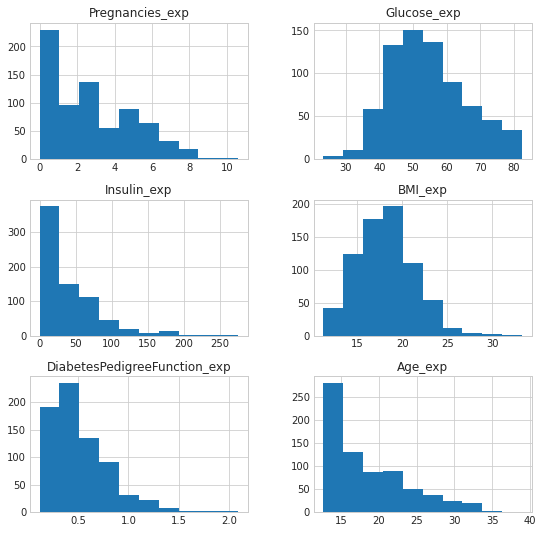

In [36]:
df_data_exp=df_data2[['Pregnancies_exp', 'Glucose_exp', 'Insulin_exp', 'BMI_exp', 'DiabetesPedigreeFunction_exp', 'Age_exp']]
df_data_exp.hist(figsize=(9, 9))

### 5. BoxCox transformation

In [37]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    df_data2[column+'_boxcox'],parameters= stat.boxcox(df_data2[column]+1)

array([[<AxesSubplot:title={'center':'Pregnancies_boxcox'}>,
        <AxesSubplot:title={'center':'Glucose_boxcox'}>],
       [<AxesSubplot:title={'center':'Insulin_boxcox'}>,
        <AxesSubplot:title={'center':'BMI_boxcox'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction_boxcox'}>,
        <AxesSubplot:title={'center':'Age_boxcox'}>]], dtype=object)

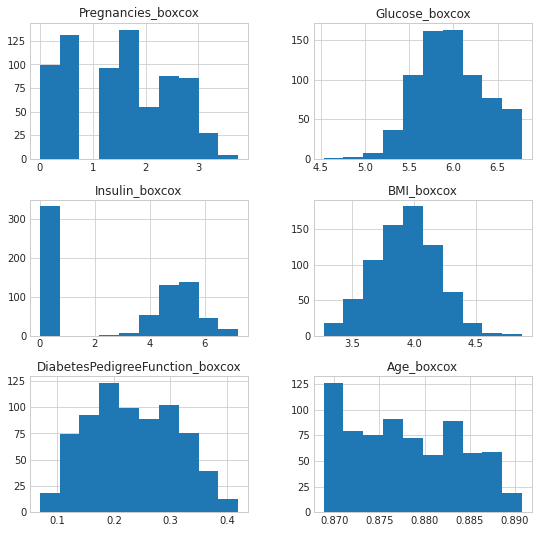

In [38]:
df_data_boxcox=df_data2[['Pregnancies_boxcox', 'Glucose_boxcox', 'Insulin_boxcox', 'BMI_boxcox', 'DiabetesPedigreeFunction_boxcox', 'Age_boxcox']]
df_data_boxcox.hist(figsize=(9, 9))

In [39]:
df_data_transf=df_data2[['Pregnancies_exp', 'Glucose_exp', 'Insulin_square', 'BMI_log', 'DiabetesPedigreeFunction_boxcox', 'Age_log', 'Outcome']]

## Model Building

In [40]:
X = df_data_transf.loc[:, df_data_transf.columns!='Outcome']
y = df_data_transf['Outcome']

In [41]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_valid.shape, y_valid.shape)

Train (506, 6) (506,)
Test (218, 6) (218,)


### 1. XGBClassifier model

In [42]:
classifier=XGBClassifier()

In [43]:
classifier.fit(X_train, y_train)

[10:03:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
y_pred=classifier.predict(X_valid)

In [45]:
print(confusion_matrix(y_valid, y_pred))

[[111  33]
 [ 20  54]]


In [46]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       144
           1       0.62      0.73      0.67        74

    accuracy                           0.76       218
   macro avg       0.73      0.75      0.74       218
weighted avg       0.77      0.76      0.76       218



### 2. RandomForestClassifier model

In [47]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(X_train, y_train)
y_pred_2=model_rf.predict(X_valid)

In [48]:
print(confusion_matrix(y_valid, y_pred_2))

[[116  28]
 [ 24  50]]


In [49]:
print(classification_report(y_valid, y_pred_2))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       144
           1       0.64      0.68      0.66        74

    accuracy                           0.76       218
   macro avg       0.73      0.74      0.74       218
weighted avg       0.76      0.76      0.76       218

